# Array-Oriented Programming with NumPy


<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/phonchi/nsysu-math106A/blob/master/static_files/presentations/10_11_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/phonchi/nsysu-math106A/blob/master/static_files/presentations/10_11_NumPy.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## Introduction

The  `NumPy`  (Numerical  Python)  library first appeared in  2006  and is the preferred Python array implementation. It offers a high-performance, richly functional n-dimensional array type called `array.` Operations on arrays are up to one or two orders of magnitude faster than those on `lists`. 

In this chapter, we explore the array's basic capabilities. The built-in lists can have multiple dimensions, and you generally process multi-dimensional lists with nested loops or list comprehensions with multiple clauses. A strength of `NumPy` is "array-oriented programming," **which uses functional-style programming with internal iteration to make array manipulations concise and straightforward**, eliminating the kinds of bugs that can occur with explicitly programmed loops. 

In `Python` the types are dynamically inferred and we do not have to allocate the memory by ourselves. This type of flexibility also points to the fact that `Python` variables are more than just their values; they also contain extra information about the type and the size of the value:

<center><img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/cint_vs_pyint.png"></center>
<div align="center"> source: https://jakevdp.github.io/PythonDataScienceHandbook/figures/cint_vs_pyint.png </div>

Similarly, the `list` in `Python` is very flexible that can store heterogeneous objects. But this flexibility comes at a cost: to allow these flexible types, each item in the list must contain its type, size, and other information. Every element is a complete `Python` object. In the special case that all variables are of the same type, **much of this information is redundant**, so storing the data in a fixed-type array can be much more efficient. The difference between a dynamic-type list and a fixed-type (`NumPy`-style) array is illustrated:

<center><img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/array_vs_list.png" width="70%" height="70%"></center>
<div align="center"> source: https://jakevdp.github.io/PythonDataScienceHandbook/figures/array_vs_list.png </div>

At the implementation level, the `array` essentially contains a single pointer to one contiguous block of data. The `Python` `list`, on the other hand, includes a pointer to a block of pointers, each of which in turn points to a whole `Python` object like the `Python` integer we saw earlier. 

> The advantage of the `list` is flexibility: because each list element is a full structure containing both data and type information, the list can be filled with data of any desired type. Fixed-type `NumPy`-style arrays lack this flexibility but are much more efficient for storing and manipulating data.

From the previous lecture, we know that every object consists of data and methods. The `ndarray` object of the `NumPy` package not only provides efficient storage of array-based data but adds to this **efficient operations** on that data. 

## Creating  `array` from Existing Data (Constructor)

In [1]:
package_name = "numpy"

try:
    __import__(package_name)
    print(f"{package_name} is already installed.")
except ImportError:
    print(f"{package_name} not found. Installing...")
    %pip install {package_name}

numpy is already installed.


The `NumPy` documentation recommends importing the `numpy` module as `np` so that you can access its members with "`np.`"

In [2]:
import numpy as np

### Creating  `array` using from fix sequence

The `numpy` module provides various functions for creating arrays. Here we use the `array()` function, which receives a collection of elements and returns a new array containing the argument's elements. Let’s pass a `list` for example: 

In [3]:
numbers = np.array([2, 3, 5, 7, 11])
numbers, type(numbers)

(array([ 2,  3,  5,  7, 11]), numpy.ndarray)

The `array()` function copies its argument's contents into the `array`. Note that the type is `numpy.ndarray`, but all arrays are output as "array."

### Multidimensional Arguments

The `array()` function copies its argument's dimensions. Let's create an `array` from a two-row-by-three-column `list`:

In [4]:
np.array([[1, 2, 3], [4, 5, 6]]), type(np.array([[1, 2, 3], [4, 5, 6]]))

(array([[1, 2, 3],
        [4, 5, 6]]),
 numpy.ndarray)

#### `array`  Attributes 

The `array` function determines an array's element type from its argument's elements. You can check the element type with an array's `dtype` attribute:

In [5]:
integers = np.array([[1, 2, 3], [4, 5, 6]])
floats = np.array([0.0, 0.1, 0.2, 0.3, 0.4])

integers.dtype, floats.dtype

(dtype('int32'), dtype('float64'))

As you’ll see in the next section, various array-creation functions receive a `dtype` keyword argument so you can specify an array’s element type. 

For performance reasons, `NumPy` is written in the C programming language and uses C's data types. By default, `NumPy` stores integers as the `NumPy` type `int_` values — which correspond to 32-bit (4-byte) integers in C (this may be platform-dependent) — and stores floating-point numbers as the NumPy type `float64` values — which correspond to 64-bit (8-byte) floating-point values (double) in C. In our examples, most commonly, you'll see the types `int32`, `float64` and `bool` for non-numeric data (such as strings). The complete list of supported types is at [https://docs.scipy.org/doc/numpy/user/basics.types.html](https://docs.scipy.org/doc/numpy/user/basics.types.html). 

The attribute `ndim` contains an array's number of dimensions and the attribute `shape` contains a tuple specifying an array's dimensions: 

In [6]:
print(integers.ndim)
print(floats.ndim)

2
1


In [7]:
print(integers.shape)
print(floats.shape)

(2, 3)
(5,)


Here, integers have 2 rows and 3 columns (6 elements) and floats are one-dimensional, containing 5 floating numbers.

You can view an array’s total number of elements with the attribute `size` and the number of bytes required to store each element with `itemsize`:

In [8]:
print(integers.size)
print(integers.itemsize)
print(floats.size)
print(floats.itemsize)

6
4
5
8


Note that the integers' size is the product of the shape tuple's values — two rows of three elements each for a total of six elements. In each case, `itemsize` is 4 because integers contain `int32` values and 8 since floats contain `float64` values.

### Filling `array` with Specific Values

`NumPy` provides functions `zeros()`, `ones()` and `full()` for creating arrays containing 0s, 1s or a specified value, respectively. By default, `zeros()` and `ones()` create arrays containing `float64` values. We’ll show how to customize the element type momentarily. The first argument to these functions must be an integer or a tuple of integers specifying the desired dimensions. For an integer, each function returns a one-dimensional array with the specified number of elements:

In [9]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

For a tuple of integers, these functions return a multidimensional array with the specified dimensions. You can specify the array's element type with the `zeros()` and `ones()` function’s `dtype` keyword argument:

In [10]:
np.ones((2, 4), dtype=np.int64)

array([[1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int64)

The array returned by `full()` contains elements with the second argument's value and type: 

In [11]:
np.full((3, 5), 13)

array([[13, 13, 13, 13, 13],
       [13, 13, 13, 13, 13],
       [13, 13, 13, 13, 13]])

### Creating `array` from sequence generated by different methods

#### Creating sequence with fix step by `arange()` 

Let's use `NumPy`'s `arange` function to create integer ranges — similar to using the built-in function `range`. In each case, `arange` first determines the resulting array’s number of elements, allocates the memory, then stores the specified range of values in the array: 

In [12]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [13]:
np.arange(5, 10)

array([5, 6, 7, 8, 9])

In [14]:
np.arange(10, 1, -2) 

array([10,  8,  6,  4,  2])

> It is the same as `range()` which takes three arguments `numpy.arange(start, stop, step)`

#### Creating sequence with fix sample number by `linspace()`

You can produce evenly spaced floating-point ranges with `NumPy`'s `linspace()` function. The function’s first two arguments specify the starting and ending values in the range, **and the ending value is included in the array**. The optional keyword argument `num` specifies the number of evenly spaced values to produce:

In [15]:
np.linspace(0.0, 1.0, num=5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

#### Reshaping an `array` 

You also can create an `array` from a range of elements, then use the array method `reshape()` to transform the one-dimensional array into a multidimensional array. Let's create an `array` containing the values from 1 through 20, then reshape it into four rows by five columns:

In [16]:
np.arange(1, 21).reshape(4, 5)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

Note the ***chained method*** calls in the preceding snippet. First, `arange` produces an array containing the values 1–20. Then we call `reshape()` on that array to get the 4-by-5 array that was displayed. You can `reshape()` any array, provided that the new shape has the same number of elements as the original. So a six-element one-dimensional array can become a 3-by-2 or 2-by-3 array, and vice versa! 

### `List` vs. `array`  Performance: Introducing  `%timeit`  

Most `array` operations execute significantly faster than corresponding `list` operations. To demonstrate, we’ll use the `%timeit` magic command, which times the average duration of operations. 

In [17]:
import random

Here, let’s use the `random` module’s `randint()` function with a list comprehension to create a list of six million die rolls and time the operation using `%timeit`:

In [18]:
%timeit rolls_list = [random.randint(1, 6) for i in range(0, 6_000_000)] #_ is use to separate long integer

3.67 s ± 15.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


> By default, `%timeit` executes a statement in a loop, and it runs the loop seven times. If you do not indicate the number of loops, `%timeit` chooses an appropriate value.

Now, let's use the `randint()` function from the `numpy.random` module to create an array

In [19]:
%timeit rolls_array = np.random.randint(1, 7, 6_000_000)

42 ms ± 805 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Indexing and Slicing (Getter and Setter)

One-dimensional arrays can be indexed and sliced using the same syntax and techniques demonstrated in the "Lists and Tuples" chapter. Here, we focus on array-specific indexing and slicing capabilities. 

To select an element in a two-dimensional array, specify a tuple containing the element's row and column indices in square brackets:

In [20]:
grades = np.array([[87, 96, 70], [100, 87, 90],
                   [94, 77, 90], [100, 81, 82]])
grades

array([[ 87,  96,  70],
       [100,  87,  90],
       [ 94,  77,  90],
       [100,  81,  82]])

In [21]:
grades[0, 1]  # row 0, column 1

96

To select a single row, specify only one index in square brackets:

In [22]:
grades[1]

array([100,  87,  90])

To select multiple sequential rows, use slice notation:

In [23]:
grades[0:2]

array([[ 87,  96,  70],
       [100,  87,  90]])

To select multiple non-sequential rows, use a list of row indices (fancy indexing):

In [24]:
grades[[1, 3]]

array([[100,  87,  90],
       [100,  81,  82]])

Let's select only the elements in the first column: 

In [25]:
grades[:, 0]

array([ 87, 100,  94, 100])

The 0 after the comma indicates that we're selecting only column 0. The `:` before the comma indicates which rows within that column to select. **In this case, `:` is a slice representing all rows**. You can select consecutive columns using a slice:

In [26]:
grades[:, 1:3]

array([[96, 70],
       [87, 90],
       [77, 90],
       [81, 82]])

or specific columns using a list of column indices:

In [27]:
grades[:, [0, 2]]

array([[ 87,  70],
       [100,  90],
       [ 94,  90],
       [100,  82]])

`array` is mutable. Therefore, if we want to modify the value of the array, we can use the previous method and put the result on the left-hand side: 

In [28]:
grades[3, 2] = 42
grades

array([[ 87,  96,  70],
       [100,  87,  90],
       [ 94,  77,  90],
       [100,  81,  42]])

### Views: Shallow Copies

***Views*** are objects "see" the data in other objects, rather than having their own copies of the data. Views are also known as ***shallow copies***. Various `array` methods and slicing operations produce views of an array's data. The `array` method `view()` returns a new array object with a view of the original array object's data. First, let’s create an array and a view of that array:

In [30]:
numbers = np.arange(1, 6)
numbers2 = numbers.view()

We can use the built-in `id()` function to see that `numbers` and `numbers2` are different objects:

In [31]:
id(numbers), id(numbers2)

(1664107572080, 1664073164144)

In [32]:
np.shares_memory(numbers, numbers2)

True

**To prove that `numbers2` views the same data as `numbers`**, let's modify an element in `numbers`, then display both arrays:

In [33]:
numbers[1] *= 10
numbers

array([ 1, 20,  3,  4,  5])

In [34]:
numbers2

array([ 1, 20,  3,  4,  5])

Similarly, changing a value in the view also changes that value in the original array:

In [35]:
numbers2[1] /= 5
numbers, numbers2

(array([1, 4, 3, 4, 5]), array([1, 4, 3, 4, 5]))

Slices also create views. Let’s make `numbers2` a slice that views only the first three elements of numbers:

In [36]:
numbers2 = numbers[0:3]
numbers2

array([1, 4, 3])

Again, we can confirm that `numbers` and `numbers2` are different objects with `id()`: 

In [38]:
id(numbers), id(numbers2), np.shares_memory(numbers, numbers2)

(1664107572080, 1664107667152, True)

Now, let's modify an element both arrays share, then display them. Again, we see that `numbers2` is a view of `numbers`:

In [39]:
numbers[1] *= 20
numbers

array([ 1, 80,  3,  4,  5])

In [40]:
numbers2

array([ 1, 80,  3])

> Note that this behavior is different from `list`, where the slicing will create a new sub `list`! 

### Deep Copies

Though views are separate `array` objects, they save memory by sharing element data from other arrays. However, when sharing mutable values, sometimes creating a ***deep copy*** with independent copies of the original data is necessary. This is especially important in multi-core programming, where separate parts of your program could attempt to modify your data at the same time, possibly corrupting it. 

The `array` method `copy()` returns a new array object with a deep copy of the original array object's data. First, let's create an array and a deep copy of that array:

In [41]:
numbers = np.arange(1, 6)
numbers2 = numbers.copy()

In [43]:
id(numbers), id(numbers2), np.shares_memory(numbers, numbers2)

(1664107664944, 1664107665712, False)

To prove that `numbers2` has a separate copy of the data in `numbers`, let’s modify an element in `numbers`, then display both arrays: 

In [42]:
numbers[1] *= 10
numbers

array([ 1, 20,  3,  4,  5])

In [44]:
numbers2

array([1, 2, 3, 4, 5])

>  Recall that if you need deep copies of other types of `Python` objects, pass them to the `copy` module’s `deepcopy()` function. 

### More about Reshaping and Transposing 

We've used `array` method `reshape()` to produce two-dimensional arrays from one-dimensional `array`. `NumPy` provides various other ways to reshape `arrays`.

The array methods `reshape()` and `resize()` both enable you to change an array's dimensions. Method `reshape()` returns a view (shallow copy) of the original array with the new dimensions. It does not modify the original array:

In [58]:
grades = np.array([[87, 96, 70], [100, 87, 90]])
grades

array([[ 87,  96,  70],
       [100,  87,  90]])

In [59]:
grades2 = grades.reshape(1, 6)

In [60]:
grades2[0, 0] = 0
grades2, grades

(array([[  0,  96,  70, 100,  87,  90]]),
 array([[  0,  96,  70],
        [100,  87,  90]]))

A common trick is that you can use `-1` to specify the shape in `resahpe()`. The length of the dimension set to `-1` is automatically determined by inferring from the specified values of other dimensions:

In [61]:
grades.reshape(-1, 2) # Same as grades.reshape(3, 2)

array([[  0,  96],
       [ 70, 100],
       [ 87,  90]])

Method `resize()` modifies the original array's shape in-place. It does not return a value:

In [62]:
grades.resize(1, 6)
grades

array([[  0,  96,  70, 100,  87,  90]])

We can also do the opposite operation, which takes a multidimensional `array` and flatten it into a single dimension with the methods `flatten()` and `ravel()`. Method `flatten()` deep copies the original `array`'s data:

In [63]:
grades = np.array([[87, 96, 70], [100, 87, 90]])
grades

array([[ 87,  96,  70],
       [100,  87,  90]])

In [64]:
flattened = grades.flatten()
flattened

array([ 87,  96,  70, 100,  87,  90])

In [65]:
flattened[0] = 100
grades

array([[ 87,  96,  70],
       [100,  87,  90]])

Method `ravel()` produces a view of the original `array`, which shares the `grades` `array`'s data!

In [66]:
raveled = grades.ravel()
raveled

array([ 87,  96,  70, 100,  87,  90])

In [67]:
raveled[0] = 100
grades

array([[100,  96,  70],
       [100,  87,  90]])

Additionally, we can effortlessly transpose an `array`'s rows and columns, causing the rows to turn into columns and the columns into rows. The `T` attribute returns a transposed view (shallow copy) of the array. Assume that the original `grades` `array` presents two students' grades (the rows) across three exams (the columns). Let's transpose the rows and columns to examine the data as the grades for three exams (the rows) taken by two students (the columns):

In [69]:
transpose = grades.T
transpose

array([[100, 100],
       [ 96,  87],
       [ 70,  90]])

Transposing does not modify the original array but it does create a view of the original array's data:

In [70]:
transpose[0, 0] = 0
grades

array([[  0,  96,  70],
       [100,  87,  90]])

You can combine arrays by adding more columns or more rows — known as horizontal stacking and vertical stacking. Let's create another 2-by-3 array of grades:

In [71]:
grades2 = np.array([[94, 77, 90], [100, 81, 82]])
grades2

array([[ 94,  77,  90],
       [100,  81,  82]])

Let's assume `grades2` represents three additional exam grades for the two students in the `grades` array. We can combine `grades` and `grades2` with `NumPy`'s `hstack()` (horizontal stack) function by passing a `tuple` containing the arrays to combine. The extra parentheses are required because `hstack()` expects one argument:

In [72]:
np.hstack((grades, grades2))

array([[  0,  96,  70,  94,  77,  90],
       [100,  87,  90, 100,  81,  82]])

Next, let's assume that `grades2` represents two more students' grades on three exams. In this case, we can combine `grades` and `grades2` with `NumPy`'s `vstack()` (vertical stack) function: 

In [73]:
np.vstack((grades, grades2))

array([[  0,  96,  70],
       [100,  87,  90],
       [ 94,  77,  90],
       [100,  81,  82]])

> ### Exercise 1: Suppose we are developing a chess game and the chess game provide two special checkerboards as follows:

<center><img src="https://drive.google.com/uc?id=1zAMarVoAZE2immDDiwo9JGQ2eGNkEVTJ" width="20%" height="20%"></center>

<center><img src="https://drive.google.com/uc?id=1zA_3dLW7dJOFh9SaMVIsuGJo73JckWF7" width="40%" height="40%"></center>

We decide to use 1 to represent the white square and 0 to represent the black square. Write a program to create two 2D arrays to represent the two checkerboards as follows:

```python
[[1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1]]
```

```python
[[1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1]]
```

Note you should not directly hardcode the above arrays. You should use `Numpy` methods to create the arrays. After you have finished the exercise, you can print out the checkerboard using the following code cell.

In [77]:
# Your answer here
checkerboard

array([[1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1.]])

In [79]:
# Your answer here
checkerboard2

array([[1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.]])

matplotlib is already installed.


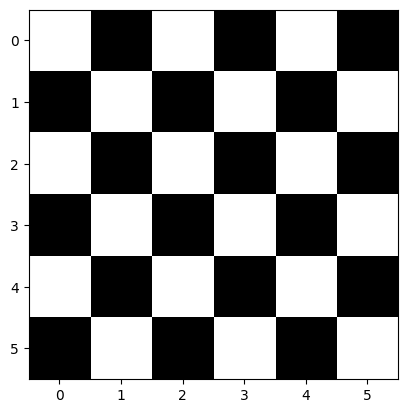

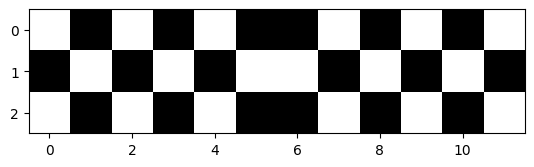

In [80]:
# Plot the checkerboard
package_name = "matplotlib"

try:
    __import__(package_name)
    print(f"{package_name} is already installed.")
except ImportError:
    print(f"{package_name} not found. Installing...")
    %pip install {package_name}

import matplotlib.pyplot as plt
plt.imshow(checkerboard, cmap='gray')
plt.show()
plt.imshow(checkerboard2, cmap='gray');

## `NumPy` calculation methods (Reduction)

An `array` includes several methods that carry out computations based on its contents. **By default, these methods disregard the array's shape and utilize all the elements in the calculations.** For instance, when computing the mean of an array, it sums all of its elements irrespective of its shape, and then divides by the total number of elements. **We can also execute these calculations on each dimension.** For example, in a two-dimensional array, we can determine the mean of each row and each column.

In [83]:
grades = np.array([[87, 96, 70], [100, 87, 90],
                   [94, 77, 90], [100, 81, 82]])
grades

array([[ 87,  96,  70],
       [100,  87,  90],
       [ 94,  77,  90],
       [100,  81,  82]])

We can use methods to calculate `sum()`, `min()`, `max()`, `mean()`, `std()` (standard deviation) and `var()` (variance) — each is a functional-style programming reduction:

In [ ]:
print(grades.sum())
print(grades.min())
print(grades.max())
print(grades.mean())
print(grades.std())
print(grades.var())

1054
70
100
87.83333333333333
8.792357792739987
77.30555555555556


### Calculations by Row or Column

Numerous calculation methods can be applied to specific `array` dimensions, referred to as the `array`'s ***axes***. These methods accept an `axis` keyword argument that designates the dimension to be utilized in the calculation, providing a convenient means to perform computations by row or column in a two-dimensional `array`.

Suppose we want to find the maximum grade for each exam, represented by the columns of `grades`. By specifying `axis=0`, the calculation is performed on all the row values within each column:

In [85]:
grades, grades.max(axis=0), grades.argmax(axis=0)

(array([[ 87,  96,  70],
        [100,  87,  90],
        [ 94,  77,  90],
        [100,  81,  82]]),
 array([100,  96,  90]),
 array([1, 0, 1], dtype=int64))

Here, 100 is the maximum value in the first column and its corresponding index (row) is 1 (if there are duplicate elements, the index of the first element will be reported). 96 and 90 are the maximum values in the second and third columns, respectively.

In [86]:
grades, grades.mean(axis=0)

(array([[ 87,  96,  70],
        [100,  87,  90],
        [ 94,  77,  90],
        [100,  81,  82]]),
 array([95.25, 85.25, 83.  ]))

Hence, 95.25 above represents the average of the first column's grades (87, 100, 94, and 100), 85.25 is the average of the second column's grades (96, 87, 77, and 81), and 83 is the average of the third column's grades (70, 90, 90, and 82). Similarly, specifying `axis=1` performs the calculation on all the column values within each individual row. To determine each student's average grade for all exams, we can use:

<center><img src="https://drive.google.com/uc?id=1zKEtJG57FacKhqblKPuhnO61BBryYQy0" width="50%" height="50%"></center>

In [87]:
grades, grades.mean(axis=1)

(array([[ 87,  96,  70],
        [100,  87,  90],
        [ 94,  77,  90],
        [100,  81,  82]]),
 array([84.33333333, 92.33333333, 87.        , 87.66666667]))

This generates four averages — one for the values in each row. Therefore, 84.33333333 is the average of row 0's grades (87, 96, and 70), and the other averages correspond to the remaining rows. For more methods, refer to [https://numpy.org/doc/stable/reference/arrays.ndarray.html](https://numpy.org/doc/stable/reference/arrays.ndarray.html).

> For more operations such as methods related to linear algebra, we can use the sub-module `numpy.linalg`, which implements basic linear algebra, such as solving linear systems, singular value decomposition, etc. However, it is not guaranteed to be compiled using efficient routines, and thus we recommend the use of `scipy.linalg`, which will introduce in a later chapter.

## `array`  Operators

### The slowness of loops

The speed of computations on `NumPy` `arrays` can range from very fast to very slow. To optimize performance, the recommended approach is to use ***vectorized operations***, which are typically implemented through `NumPy`'s universal functions (`ufuncs`). In scenarios that involve executing numerous small operations repeatedly, the inherent sluggishness of `Python` often becomes apparent. One such instance is when we loop over `arrays` to perform operations on each element. For example, suppose we have an array of values and need to compute the reciprocal of each value. A straightforward approach might involve:

In [ ]:
def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

values = np.random.randint(1, 10, 5)
compute_reciprocals(values)

array([0.11111111, 0.25      , 0.16666667, 0.14285714, 0.5       ])

But if we measure the execution time of this code for a large input, we see that this operation is very slow:

In [ ]:
big_array = np.random.randint(1, 10, 1_000_000)

In [ ]:
%%timeit 
compute_reciprocals(big_array)

1.33 s ± 3.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


> Interestingly, the bottleneck in this situation isn't the operations themselves, but rather the type checking and function dispatches that `Python` needs to execute during each iteration of the loop. Whenever the reciprocal is calculated, `Python` initially verifies the type of the object and performs a dynamic lookup to determine the correct function to employ for that type. If we were using compiled code, this kind of specification would be predetermined before the code execution, resulting in much more efficient computations.

In `NumPy`, ***vectorization*** is the process of performing operations on entire `arrays` of data, as opposed to individual elements. This is accomplished by applying an operation to the entire `array`, instead of looping through each element of the `array` one at a time.

In [ ]:
1.0 / values # The vectorized version of the above code

array([0.11111111, 0.25      , 0.16666667, 0.14285714, 0.5       ])

The above syntax is the vectorized version of the original code and works due to the ***broadcasting***. Looking at the execution time for our big `array`, we see that it completes orders of magnitude faster than the `Python` loop:

In [ ]:
%%timeit 
(1.0 / big_array)

2.04 ms ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The execution time is much faster since the vectorization operation is done via `ufuncs`, which is a compiled routine. Now we will introduce each concept in detail, including broadcasting, `ufuncs` and vectorization.

#### Element-wise arithmetic

`NumPy` offers numerous operators that allow us to create simple expressions that carry out operations on whole arrays and returns another `array`. Firstly, let's perform **element-wise arithmetic with arrays and numeric values** by employing arithmetic operators and augmented assignments. Element-wise operations are applied to each element, so the snippet below doubles every element and cubes every element. Each operation returns a new array containing the result:

In [88]:
numbers = np.arange(1, 7) # array([1, 2, 3, 4, 5, 6])
numbers * 2

array([ 2,  4,  6,  8, 10, 12])

In [89]:
numbers ** 3

array([  1,   8,  27,  64, 125, 216], dtype=int32)

Augmented assignments modify every element in the left operand in place!

In [90]:
numbers += 10
numbers

array([11, 12, 13, 14, 15, 16])

### Broadcasting 

Typically, arithmetic operations necessitate two `arrays` of identical size and shape as operands. When one operand is a single value, known as a scalar, `NumPy` carries out the element-wise calculations **as though the scalar were an array of the same shape as the other operand, but with the scalar value present in all its elements.** This is referred to as ***broadcasting***. The snippets above demonstrate this capability. For instance, `numbers * 2` is equivalent to `numbers * [2, 2, 2, 2, 2, 2]`.

Broadcasting can also be applied between `arrays` of varying sizes and shapes, enabling concise and powerful manipulations. We will present more examples of broadcasting later in this chapter when we introduce `NumPy`'s universal functions.

#### Arithmetic Operations Between `arrays`

Arithmetic operations and augmented assignments can be performed between arrays of the same shape. Let's multiply the one-dimensional arrays `numbers` and `numbers2` (created below), each containing five elements:

In [91]:
numbers2 = np.linspace(1.1, 6.6, 6) 
numbers * numbers2 # array([11, 12, 13, 14, 15, 16]) * array([ 1.1,  2.2,  3.3,  4.4,  5.5, 6.6])

array([ 12.1,  26.4,  42.9,  61.6,  82.5, 105.6])

The outcome is a new `array` created by multiplying the elements of each operand element-wise — `11 * 1.1, 12 * 2.2, 13 * 3.3`, and so on. Arithmetic operations between `arrays` of integers and floating-point numbers result in an `array` of floating-point numbers. Let's see another example:

In [92]:
c = np.ones((3, 3))
c * c 

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Note that the above operation is not matrix multiplication. To perform matrix multiplication use the `dot()` method!

In [93]:
c.dot(c)

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

The above operation is the same as using the `@` operator:

In [94]:
c @ c

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

We can apply broadcasting to higher-dimensional `arrays` in a similar way. For instance, consider adding a one-dimensional `arra`y to a two-dimensional `array` and observe the resulting output:

In [95]:
a = np.array([0, 1, 2])
M = np.ones((3, 3))
print(a.shape, M.shape)
M + a

(3,) (3, 3)


array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Here, the one-dimensional array `a` is stretched, or broadcasted, across the second dimension in order to match the shape of `M`.

#### Rules of Broadcasting

In `NumPy`, broadcasting adheres to a strict set of regulations that govern how two `arrays` interact with one another. These rules are as follows:

1. When the number of dimensions between two `arrays` differs, the `array` with fewer dimensions is padded with ones on its leading (left) side to match the number of dimensions of the other `array`.
2. If the shape of the two `arrays` doesn't match in any dimension, the `array` with a shape of 1 in that dimension is expanded to match the shape of the other `array`.
3. If the sizes of the `arrays` conflict in any dimension and neither is equal to 1, an error is raised.

Now let's take a look at an example where both `arrays` need to be broadcast:

In [ ]:
a = np.arange(0, 40, 10).reshape(4,1)
b = np.arange(3)
print(a.shape, b.shape)
a, b

(4, 1) (3,)


(array([[ 0],
        [10],
        [20],
        [30]]),
 array([0, 1, 2]))

In [ ]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

1. To begin, we need to determine the shapes of the two `arrays`: `a.shape` is `(4,1)` and `b.shape` is `(3,)`. According to Rule 1, we have to add ones to the shape of `b` such that its dimensions match those of `a`. Thus, `b.shape` becomes `(1,3)`.

2. Next, Rule 2 states that we need to expand each of the 1s in `b.shape` to match the corresponding size of the other `array`. Consequently, `a.shape` becomes `(4,3)`, and `b.shape` becomes `(4,3)` since 1 was replicated three times to match the size of `a`.

3. Since the shapes of the two `arrays` now match, they are compatible. 

This entire process can be depicted visually as follows:

<center><img src="https://drive.google.com/uc?id=1zKGHApvzo2NvyuB2vLfu6en9WI0_QCUj" width="70%" height="70%"></center>

Next, let's look at an example in which the two `arrays` are incompatible!

In [96]:
M = np.ones((3, 2))
a = np.arange(3)

M.shape, a.shape

((3, 2), (3,))

1. First, we need to determine the shapes of the two `arrays`: `M.shape` is `(3,2)`, and `a.shape` is `(3,)`. As per Rule 1, we must pad ones to the shape of `a` such that its number of dimensions matches that of `M`. Consequently, `a.shape` becomes `(1, 3)`, while `M.shape` remains the same.

2. Next, Rule 2 requires that we stretch the first dimension of `a` to match that of `M`. Therefore, `a.shape` becomes `(3,3)`, while `M.shape` stays the same.

3. However, Rule 3 comes into play, here since the final shapes of the two `arrays` do not match. As a result, these two `arrays` are incompatible. 

This incompatibility is evident when we attempt to perform this operation.

In [97]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

#### Comparing arrays

Both individual values and other arrays can be compared in `NumPy`. The comparisons are carried out element-wise, producing arrays of Boolean values where the value of each element represents the outcome of the comparison, either `True` or `False`:

In [ ]:
numbers >= 13 # numbers = array([11, 12, 13, 14, 15, 16])

array([False, False,  True,  True,  True,  True])

Note that the above expression implicitly used broadcasting!

In [ ]:
numbers2 < numbers # numbers2 = array([ 1.1,  2.2,  3.3,  4.4,  5.5, 6.6])

array([ True,  True,  True,  True,  True,  True])

In [ ]:
numbers == numbers2

array([False, False, False, False, False, False])

In [ ]:
numbers == numbers

array([ True,  True,  True,  True,  True,  True])

### Universal Functions (Vectorization)

Now we will delve into how `NumPy` perform element-wise operations on `arrays` without using the `for` loop: `NumPy` provides more operators/functions as standalone ***universal functions*** (also known as `ufuncs`) that perform various operations element-wise, meaning that they apply the same operation to each element in an `array`. These functions operate on one or two `array`-like arguments (such as `lists`) and are utilized to perform tasks. Some of these functions are automatically invoked when operators like `+` and `*` are used with `arrays`. Each `ufunc` generates a new `array` that contains the results of the operation.

`NumPy` offers a practical interface for various kinds of operations that directly access statically typed and compiled routines. These operations are called ***vectorized operations***. Vectorization is achieved using `array` operations, such as addition, subtraction, multiplication, and division. In addition, it can also be achieved by using `ufunc`. These vectorized methods are intended to move the loop to the compiled layer that underpins `NumPy`, leading to considerably quicker execution.

We can view the complete list, their descriptions and more information about universal functions at [https://numpy.org/doc/stable/reference/ufuncs.html](https://numpy.org/doc/stable/reference/ufuncs.html)

> See [here](https://www.labri.fr/perso/nrougier/from-python-to-numpy/#problem-vectorization) for more vectorization examples in different thinking levels.

#### Exploring `NumPy`’s `Ufuncs`

Let's add two `arrays` with the same shape, using the `add()` universal function:

In [103]:
numbers2 = np.arange(1, 7) * 10  # array([10, 20, 30, 40, 50, 60])
np.add(numbers, numbers2)        # equivalent to numbers + numbers2, numbers = array([11, 12, 13, 14, 15, 16])

array([21, 32, 43, 54, 65, 76])

#### Broadcasting with Universal Functions

Let's use the `multiply()` universal function to multiply every element of `numbers2` by the scalar value 5:

In [104]:
np.multiply(numbers2, 5) # equivalent to numbers2 * 5

array([ 50, 100, 150, 200, 250, 300])

Let's reshape `numbers2` into a 2-by-3 array, then multiply its values by a one-dimensional `array` of three elements:

In [105]:
numbers3 = numbers2.reshape(2, 3)
numbers4 = np.array([2, 4, 6])
numbers3, numbers4

(array([[10, 20, 30],
        [40, 50, 60]]),
 array([2, 4, 6]))

In [106]:
np.multiply(numbers3, numbers4) # Equivalent to numbers3 * numbers4

array([[ 20,  80, 180],
       [ 80, 200, 360]])

In this case, `numbers4` has the same length as each row of `numbers3`, allowing `NumPy` to apply the multiplication operation by treating `numbers4` as an `array` with the following values:

```python
array([[2, 4, 6],
       [2, 4, 6]])
```

If a universal function receives two `arrays` with different shapes that do not support broadcasting, a `ValueError` is raised. Vectorization and `ufunc` functions are closely associated with broadcasting in `NumPy`, as they are frequently employed together to perform element-wise operations on arrays with varying shapes. By combining vectorization, `ufunc` functions, and broadcasting, we can effectively execute complex arithmetic operations on `NumPy` `arrays`.

There are other special mathematical `ufunc`. Let's create an array and calculate the square root of its values using the `sin()` universal function:

In [107]:
numbers = np.array([1, 4, 9, 16, 25, 36])
np.sin(numbers)

array([ 0.84147098, -0.7568025 ,  0.41211849, -0.28790332, -0.13235175,
       -0.99177885])

#### Create our own vectorizing functions

The vectorized operation are often more concise, and it is thus advisable to avoid element-wise looping over vectors and matrices and instead employ vectorized algorithms. The initial step in converting a scalar algorithm to a vectorized algorithm involves verifying that the functions we create can function with vector inputs:

In [ ]:
def Theta(x, th):
    """
    Scalar implemenation of a variant of Heaviside step function.
    """
    if x >= th:
        return 1
    else:
        return 0

We can achieve this using `np.vectorize` function:

In [ ]:
Theta_vec = np.vectorize(Theta)
Theta_vec(np.array([-3,-2,-1,0,1,2,3]), 1)

array([0, 0, 0, 0, 1, 1, 1])

> Don’t assume `np.vectorize()` is faster. It is mainly for convenient and concise purposes as described [here](https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html).

> ### Exercise 2: Suppose we are dealing with a spreadsheet that records the grade of students. The grade contains the homework, midterm and finals as follows:

<div align="center">

| Name | HW1 | HW2 | HW3 | HW4 | Midterm | Final |
| --- | --- | --- | --- | --- | --- | --- |
| Alice | 90 | 80 | 70 | 100 | 90 | 95 |
| Bob | 80 | 90 | 100 | 70 | 85 | 80 |
| Charlie | 70 | 100 | 90 | 80 | 95 | 90 |
| David | 60 | 70 | 80 | 90 | 85 | 100 |
| Eve | 50 | 60 | 70 | 80 | 75 | 90 |

</div>

We would like to calculate the semester score of each student by the following rules:

1. The weight of each score is 0.2 (the summation of four homework accounts for 20% of the total scores and each homework has the same weight), 0.4 and 0.4 for HW, Midterm and Final, respectively. 

2. We adjust each student's score so that the top performer in the class gets a score of 100 by adding the same constant score to each student's score.

We use a 2D array to model the grades so that each row corresponds to a student's score. Use the following template to complete the task:

```python
grades = np.array([[90, 80, 70, 100, 90, 95],
                   [80, 90, 100, 70, 85, 80],
                   [70, 100, 90, 80, 95, 90],
                   [60, 70, 80, 90, 85, 100],
                   [50, 60, 70, 80, 75, 90]])

weights = np.array([])
scores
```

In [ ]:
# Your code here

### Type casting

Due to the nature of static typing, the type of a `NumPy` `array` does not change once created. However, we can explicitly convert an `array` of one type to another using the `astype()` function. This operation always generates a new `array` with a new type.

In [112]:
M = np.random.rand(5,5)
M.dtype

dtype('float64')

In [113]:
M2 = M.astype(np.int64)
M2

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int64)

See [https://scipy-lectures.org/intro/numpy/elaborate_arrays.html](https://scipy-lectures.org/intro/numpy/elaborate_arrays.html) for more details.

## File I/O

`NumPy` has its own binary format, not portable but with efficient I/O. This is useful when storing and reading back `array` data. Use the functions `numpy.save()` and `numpy.load()`.

In [114]:
np.save("random-matrix.npy", M)
M2 = np.load("random-matrix.npy")
M2

array([[0.38791019, 0.93061564, 0.33040029, 0.9810319 , 0.92882123],
       [0.87579212, 0.57436978, 0.99856211, 0.83380903, 0.34188505],
       [0.30067505, 0.99334148, 0.89929337, 0.78057549, 0.10613898],
       [0.71493999, 0.02124826, 0.95090779, 0.12435095, 0.55611604],
       [0.05511708, 0.7047183 , 0.26478257, 0.21195283, 0.77090752]])

In summary:

To make the code faster using `NumPy`  

- In place operations: `a *= 3` instead of `a = 3*a`
- Use views instead of copies whenever possible
- Broadcasting: Use broadcasting to do operations on `arrays`
- Vectorizing `for` loops: Find tricks to avoid `for` loops using `NumPy` `arrays`.

The comparisons between `list` and `array` are summarized as follows:


**Python** objects:

- `Python` `lists` are very general. They can contain any kind of object and are dynamically typed 
- However, they do not support mathematical functions such as matrix multiplications. Implementing such functions for `Python` `lists` would not be very efficient because of the dynamic typing

**NumPy** provides:

- `Numpy` `arrays` are **statically typed** and **homogeneous**. The type of the elements is determined when the `array` is created
- Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `NumPy` arrays can be implemented in a compiled language (C and Fortran is used). Moreover, `Numpy` `arrays` are memory efficient